In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import unicodedata
import re
# Machine learning algorithms.
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
final_test = pd.read_excel('Final_Test_Doctors_Fee.xlsx')
final_train = pd.read_excel('Final_Train_Doctors_Fee.xlsx')

In [3]:
final_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
final_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
# finding shape of dataset

print("Final Test Shape: ",final_test.shape)
print("*"*50)
print("Final Train Shape: ",final_train.shape)

Final Test Shape:  (1987, 6)
**************************************************
Final Train Shape:  (5961, 7)


In [6]:
# finding information of dataset
print("Final Test info: ",final_test.info())
print("*"*50)
print("*"*50)
print("Final Train info: ",final_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB
Final Test info:  None
**************************************************
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   objec

In [7]:
# Finding detail about column 'Qualification' i.e.minimum and maximum qualification
print("Final Train Data")
print("-"*50)
traindata = final_train.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualification of a doctor in the train data is {}\n".format(traindata.max()))
print("and qualification is : {}\n\n".format(final_train.Qualification[traindata.idxmax()]))
print("Minimum qualification of a doctor in the train data is {}\n".format(traindata.min()))
print("and qualification is : {}\n\n".format(final_train.Qualification[traindata.idxmin()]))
print("*"*50)
print("*"*50)
print("Final Test Data")
print("-"*50)
testdata = final_test.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualification of a doctor in the test data is {}\n".format(testdata.max()))
print("and qualification is : {}\n\n".format(final_test.Qualification[testdata.idxmax()]))
print("Minimum qualification of a doctor in the test data is {}\n".format(testdata.min()))
print("and qualification is : {}\n\n".format(final_test.Qualification[testdata.idxmin()]))

Final Train Data
--------------------------------------------------
Maximum qualification of a doctor in the train data is 10

and qualification is : Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


Minimum qualification of a doctor in the train data is 1

and qualification is : BAMS


**************************************************
**************************************************
Final Test Data
--------------------------------------------------
Maximum qualification of a doctor in the test data is 17

and qualification is : BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC)

In [9]:
# finding any special or unusual character present in column qualification using sort
print("Final Train Data")
print("-"*50)
sorted(final_train.Qualification[final_train.Qualification.apply(lambda x: len(x.split(','))).idxmax()].split(","))

Final Train Data
--------------------------------------------------


[' Certificate in Cosmetic Dentistry',
 ' Certification in Full Mouth Rehabilitation',
 ' Certified Advance Course In Endodontics',
 ' Certified BPS Dentist',
 ' Certified in Orthodontics',
 ' Degree in Dental Implant',
 ' Fellowship in Advanced Endoscopic Sinus Surgery',
 ' Fellowship in Lasers & Cosmetology',
 ' Professional Implantology Training Course (PITC)',
 'Fellowship in Oral implantlogy']

# Cleaning of data

In [10]:
# defining functions to remove special or unusual characters\# replace "," with '-' inside bracket only
def sortqual(text):
    arr = re.sub(r'\([^()]+\)', lambda x: x.group().replace(",","-"), text)
    return ','.join(sorted(arr.lower().replace(" ","").split(",")))

In [11]:
# applying the above function on the Qualification column

# Train Set
final_train.Qualification = final_train.Qualification.apply(lambda x: sortqual(x))

# Test Set
final_test.Qualification = final_test.Qualification.apply(lambda x: sortqual(x))

In [12]:
# function to creat a doc of all qualifications seretated by ','
def doc(series):
    qualific = ''
    for i in series:
        qualific += i +','
    return qualific

In [13]:
# Listing top 10 unique qualification along their occurance in final_train
text = doc(final_train.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), 
                            orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(10)

,Qualification,Count
0,mbbs,2808
1,bds,1363
2,bams,764
3,bhms,749
4,md-dermatology,606
5,ms-ent,411
6,venereology&leprosy,297
7,md-generalmedicine,285
8,diplomainotorhinolaryngology(dlo),250
9,md-homeopathy,181


In [14]:
# Listing top 10 unique qualification along their occurance in final_test
text = doc(final_test.Qualification)
df = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), 
                            orient='index').reset_index()
df.columns=['Qualification','Count']
df.head(10)

,Qualification,Count
0,mbbs,980
1,bds,428
2,bhms,249
3,bams,243
4,md-dermatology,196
5,ms-ent,128
6,md-generalmedicine,99
7,venereology&leprosy,91
8,diplomainotorhinolaryngology(dlo),85
9,ddvl,67


In [16]:
# as we see that there are max 10 multiple columns in Qualification. Se we are spliting it into different columns.

final_train['Qualify_1'] = final_train['Qualification'].str.split(',').str[0]
final_train['Qualify_2'] = final_train['Qualification'].str.split(',').str[1]
final_train['Qualify_3'] = final_train['Qualification'].str.split(',').str[2]
final_train['Qualify_4'] = final_train['Qualification'].str.split(',').str[3]
final_train['Qualify_5'] = final_train['Qualification'].str.split(',').str[4]
final_train['Qualify_6'] = final_train['Qualification'].str.split(',').str[5]
final_train['Qualify_7'] = final_train['Qualification'].str.split(',').str[6]
final_train['Qualify_8'] = final_train['Qualification'].str.split(',').str[7]
final_train['Qualify_9'] = final_train['Qualification'].str.split(',').str[8]
final_train['Qualify_10'] = final_train['Qualification'].str.split(',').str[9]

In [17]:
# we'll impute 'non' in many blank place as minumum qualification is 1

final_train['Qualify_1'].fillna("non",inplace = True)
final_train['Qualify_2'].fillna("non",inplace = True)
final_train['Qualify_3'].fillna("non",inplace = True)
final_train['Qualify_4'].fillna("non",inplace = True)
final_train['Qualify_5'].fillna("non",inplace = True)
final_train['Qualify_6'].fillna("non",inplace = True)
final_train['Qualify_7'].fillna("non",inplace = True)
final_train['Qualify_8'].fillna("non",inplace = True)
final_train['Qualify_9'].fillna("non",inplace = True)
final_train['Qualify_10'].fillna("non",inplace = True)

In [20]:
final_train.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Qualify_1,Qualify_2,Qualify_3,Qualify_4,Qualify_5,Qualify_6,Qualify_7,Qualify_8,Qualify_9,Qualify_10
0,"bhms,md-homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,bhms,md-homeopathy,non,non,non,non,non,non,non,non
1,"bams,md-ayurvedamedicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,bams,md-ayurvedamedicine,non,non,non,non,non,non,non,non


In [21]:
# Column Experience is also object dtype as there is srting reflection.
# Hence splicing it and converting it to int dtype

final_train['Experience'] = final_train['Experience'].str.slice(stop=2).astype(int)

In [28]:
# Rating column is also reflecting as object dtype as its reflection special character'%''
# We'll fill null value by'0%, converitng it into int dtype and int
final_train['Rating'].fillna('0%',inplace = True)
final_train['Rating'] = final_train['Rating'].str.slice(stop = -1).astype(int)

In [31]:
# For Column Place its asme as column Qualification hence spliting it into 2 (i.e. locality and city)
# and filling the nan value by 'non'

final_train['Locality'] = final_train['Place'].str.split(',').str[0]
final_train['City'] = final_train['Place'].str.split(',').str[1]

final_train['Locality'].fillna("non",inplace=True)
final_train["City"].fillna("non",inplace=True)

In [34]:
final_train.Profile.unique()
# Profile is reflection fine

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [36]:
final_train.Miscellaneous_Info.unique()
# we see that this column is mostly divided in 3 parts
# firstly ratings in'%' then number of peoplr voted for them and finally address
# we already have ratings and address in different columns 
# hence we'll drop it as we do not need it now

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [37]:
# We are dropping Qualification,Place & Miscellaneous_Info columns 
# Making a copy of the dataset
train_df = final_train.copy()
train_df.drop(['Qualification','Place','Miscellaneous_Info'],inplace=True,axis=1)

In [38]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Experience  5961 non-null   int32 
 1   Rating      5961 non-null   int32 
 2   Profile     5961 non-null   object
 3   Fees        5961 non-null   int64 
 4   Qualify_1   5961 non-null   object
 5   Qualify_2   5961 non-null   object
 6   Qualify_3   5961 non-null   object
 7   Qualify_4   5961 non-null   object
 8   Qualify_5   5961 non-null   object
 9   Qualify_6   5961 non-null   object
 10  Qualify_7   5961 non-null   object
 11  Qualify_8   5961 non-null   object
 12  Qualify_9   5961 non-null   object
 13  Qualify_10  5961 non-null   object
 14  Locality    5961 non-null   object
 15  City        5961 non-null   object
dtypes: int32(2), int64(1), object(13)
memory usage: 698.7+ KB


<function matplotlib.pyplot.show(*args, **kw)>

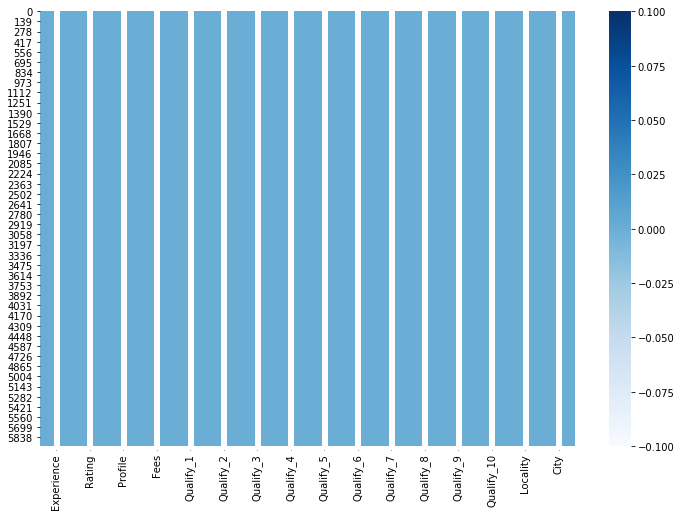

In [42]:
# findinf if their is any nan value present in the dataset using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(train_df.isnull(),cmap="Blues",annot=True)
plt.show
# no null value is reflecting

In [40]:
# checking null value without visualization
train_df.isnull().sum()

Experience    0
Rating        0
Profile       0
Fees          0
Qualify_1     0
Qualify_2     0
Qualify_3     0
Qualify_4     0
Qualify_5     0
Qualify_6     0
Qualify_7     0
Qualify_8     0
Qualify_9     0
Qualify_10    0
Locality      0
City          0
dtype: int64

In [39]:
train_df.shape

(5961, 16)

# Summary Statistics

In [43]:
train_df.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640
std,11.142798,47.340934,190.920373
min,0.000000,0.000000,5.000000
25%,9.000000,0.000000,150.000000
50%,14.000000,0.000000,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


# Data Visualization

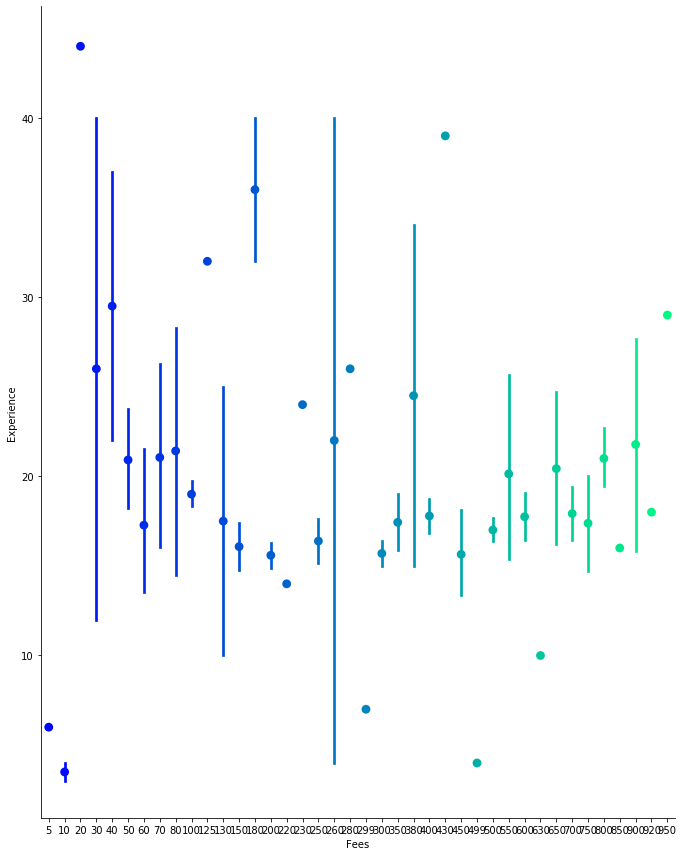

In [48]:
# finding relation between fees and experience

sns.factorplot('Fees','Experience', data= final_train,size=12,aspect=0.8,palette='winter',join=False)


<Figure size 864x576 with 0 Axes>

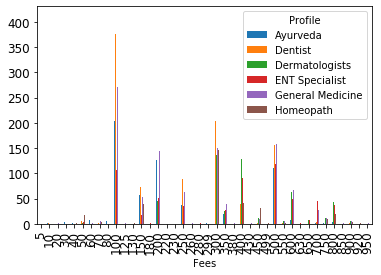

In [51]:
# relationship of Profile with Fees
plt.figure(figsize=(12,8))
final_train.groupby(['Fees','Profile']).size().unstack("Profile").plot(kind="bar",fontsize=12)

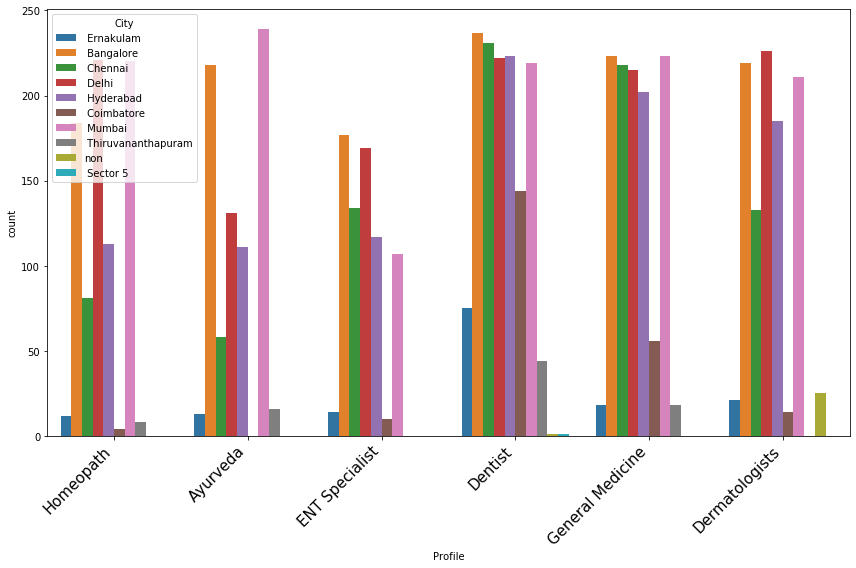

In [54]:
# Well try to find the relation between profile and city
plt.figure(figsize=(12,8))
chart = sns.countplot(final_train['Profile'], hue=final_train['City'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45,fontsize=15, ha="right")
plt.tight_layout()

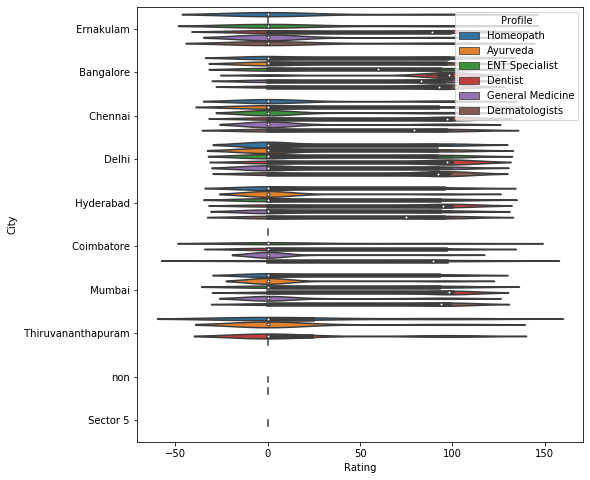

In [57]:
# finding what is the the Rating given in locality in the given profile
fig=plt.subplots(figsize=(8,8))
sns.violinplot(x='Rating', y='City', hue='Profile',data=final_train)

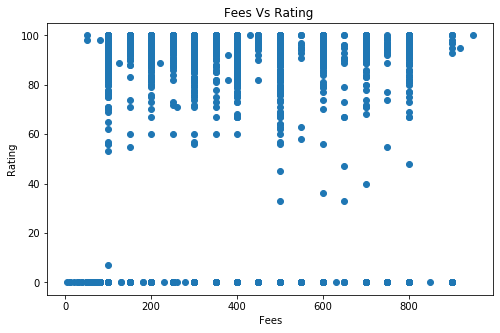

In [61]:
#lets check how Fees is changing with respect to Rating
plt.figure(figsize=(8,5))
plt.scatter(train_df['Fees'],train_df['Rating'])
plt.title("Fees Vs Rating ")
plt.ylabel("Rating")
plt.xlabel("Fees")
plt.show()

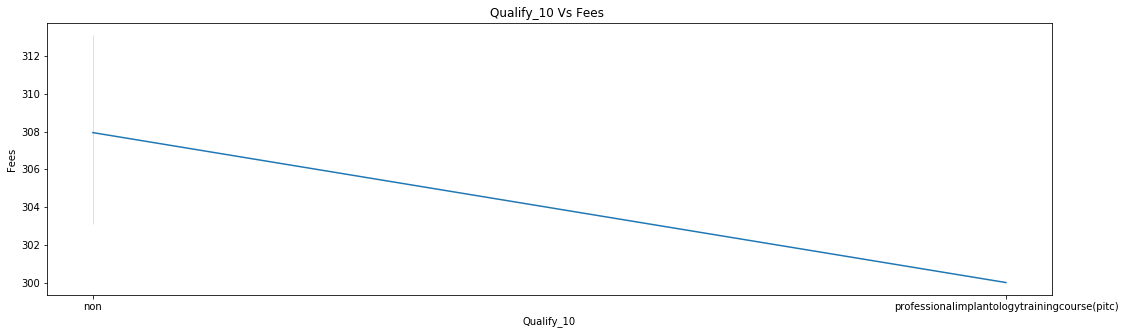

In [63]:
#lets check how Qualify_10 is changing with respect to Fees
plt.figure(figsize=(18,5))
sns.lineplot(x=train_df["Qualify_10"],y=train_df["Fees"],data=train_df)
plt.title("Qualify_10 Vs Fees ")
plt.ylabel("Fees")
plt.xlabel("Qualify_10")
plt.show()

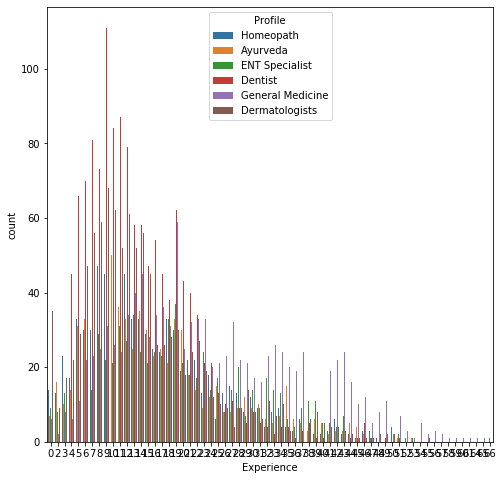

In [64]:
# relation between experienceand profile
plt.figure(figsize=(8,8))
sns.countplot(train_df['Experience'], hue=train_df['Profile'])

In [45]:
train_df.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'Qualify_1', 'Qualify_2',
       'Qualify_3', 'Qualify_4', 'Qualify_5', 'Qualify_6', 'Qualify_7',
       'Qualify_8', 'Qualify_9', 'Qualify_10', 'Locality', 'City'],
      dtype='object')

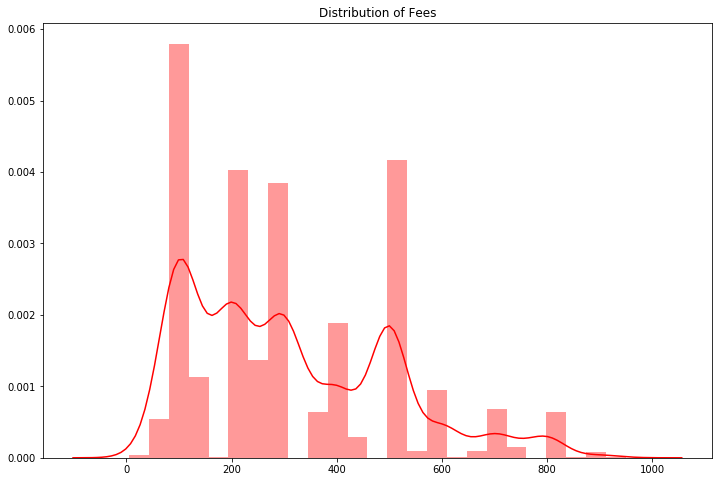

In [68]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Fees")
price = train_df['Fees'].values
sns.distplot(price, color = 'red')

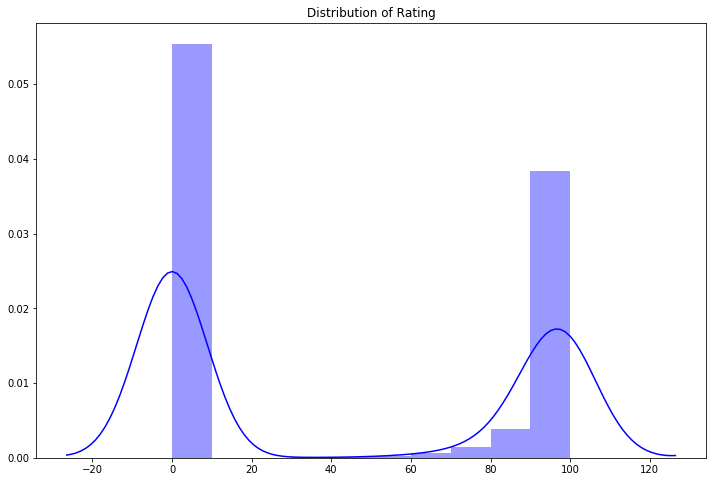

In [69]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Rating")
price = train_df['Rating'].values
sns.distplot(price, color = 'blue')

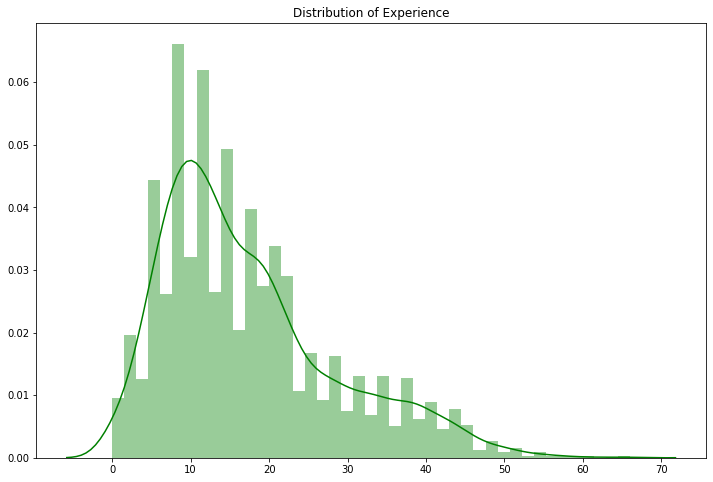

In [71]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Experience")
price = train_df['Experience'].values
sns.distplot(price, color = 'green')

In [78]:

# importing label encoder to convert dtype from object to int
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# making a copy of the dataset
df_train=train_df.copy()

# using label encoder to convert the dtype
list =['Profile','Qualify_1', 'Qualify_2','Qualify_3', 'Qualify_4', 'Qualify_5', 
       'Qualify_6', 'Qualify_7','Qualify_8', 'Qualify_9', 'Qualify_10', 'Locality', 'City']
for i in list:
    df_train[i] = label_encoder.fit_transform(df_train[i])

In [79]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  5961 non-null   int32
 1   Rating      5961 non-null   int32
 2   Profile     5961 non-null   int32
 3   Fees        5961 non-null   int64
 4   Qualify_1   5961 non-null   int32
 5   Qualify_2   5961 non-null   int32
 6   Qualify_3   5961 non-null   int32
 7   Qualify_4   5961 non-null   int32
 8   Qualify_5   5961 non-null   int32
 9   Qualify_6   5961 non-null   int32
 10  Qualify_7   5961 non-null   int32
 11  Qualify_8   5961 non-null   int32
 12  Qualify_9   5961 non-null   int32
 13  Qualify_10  5961 non-null   int32
 14  Locality    5961 non-null   int32
 15  City        5961 non-null   int32
dtypes: int32(15), int64(1)
memory usage: 396.0 KB


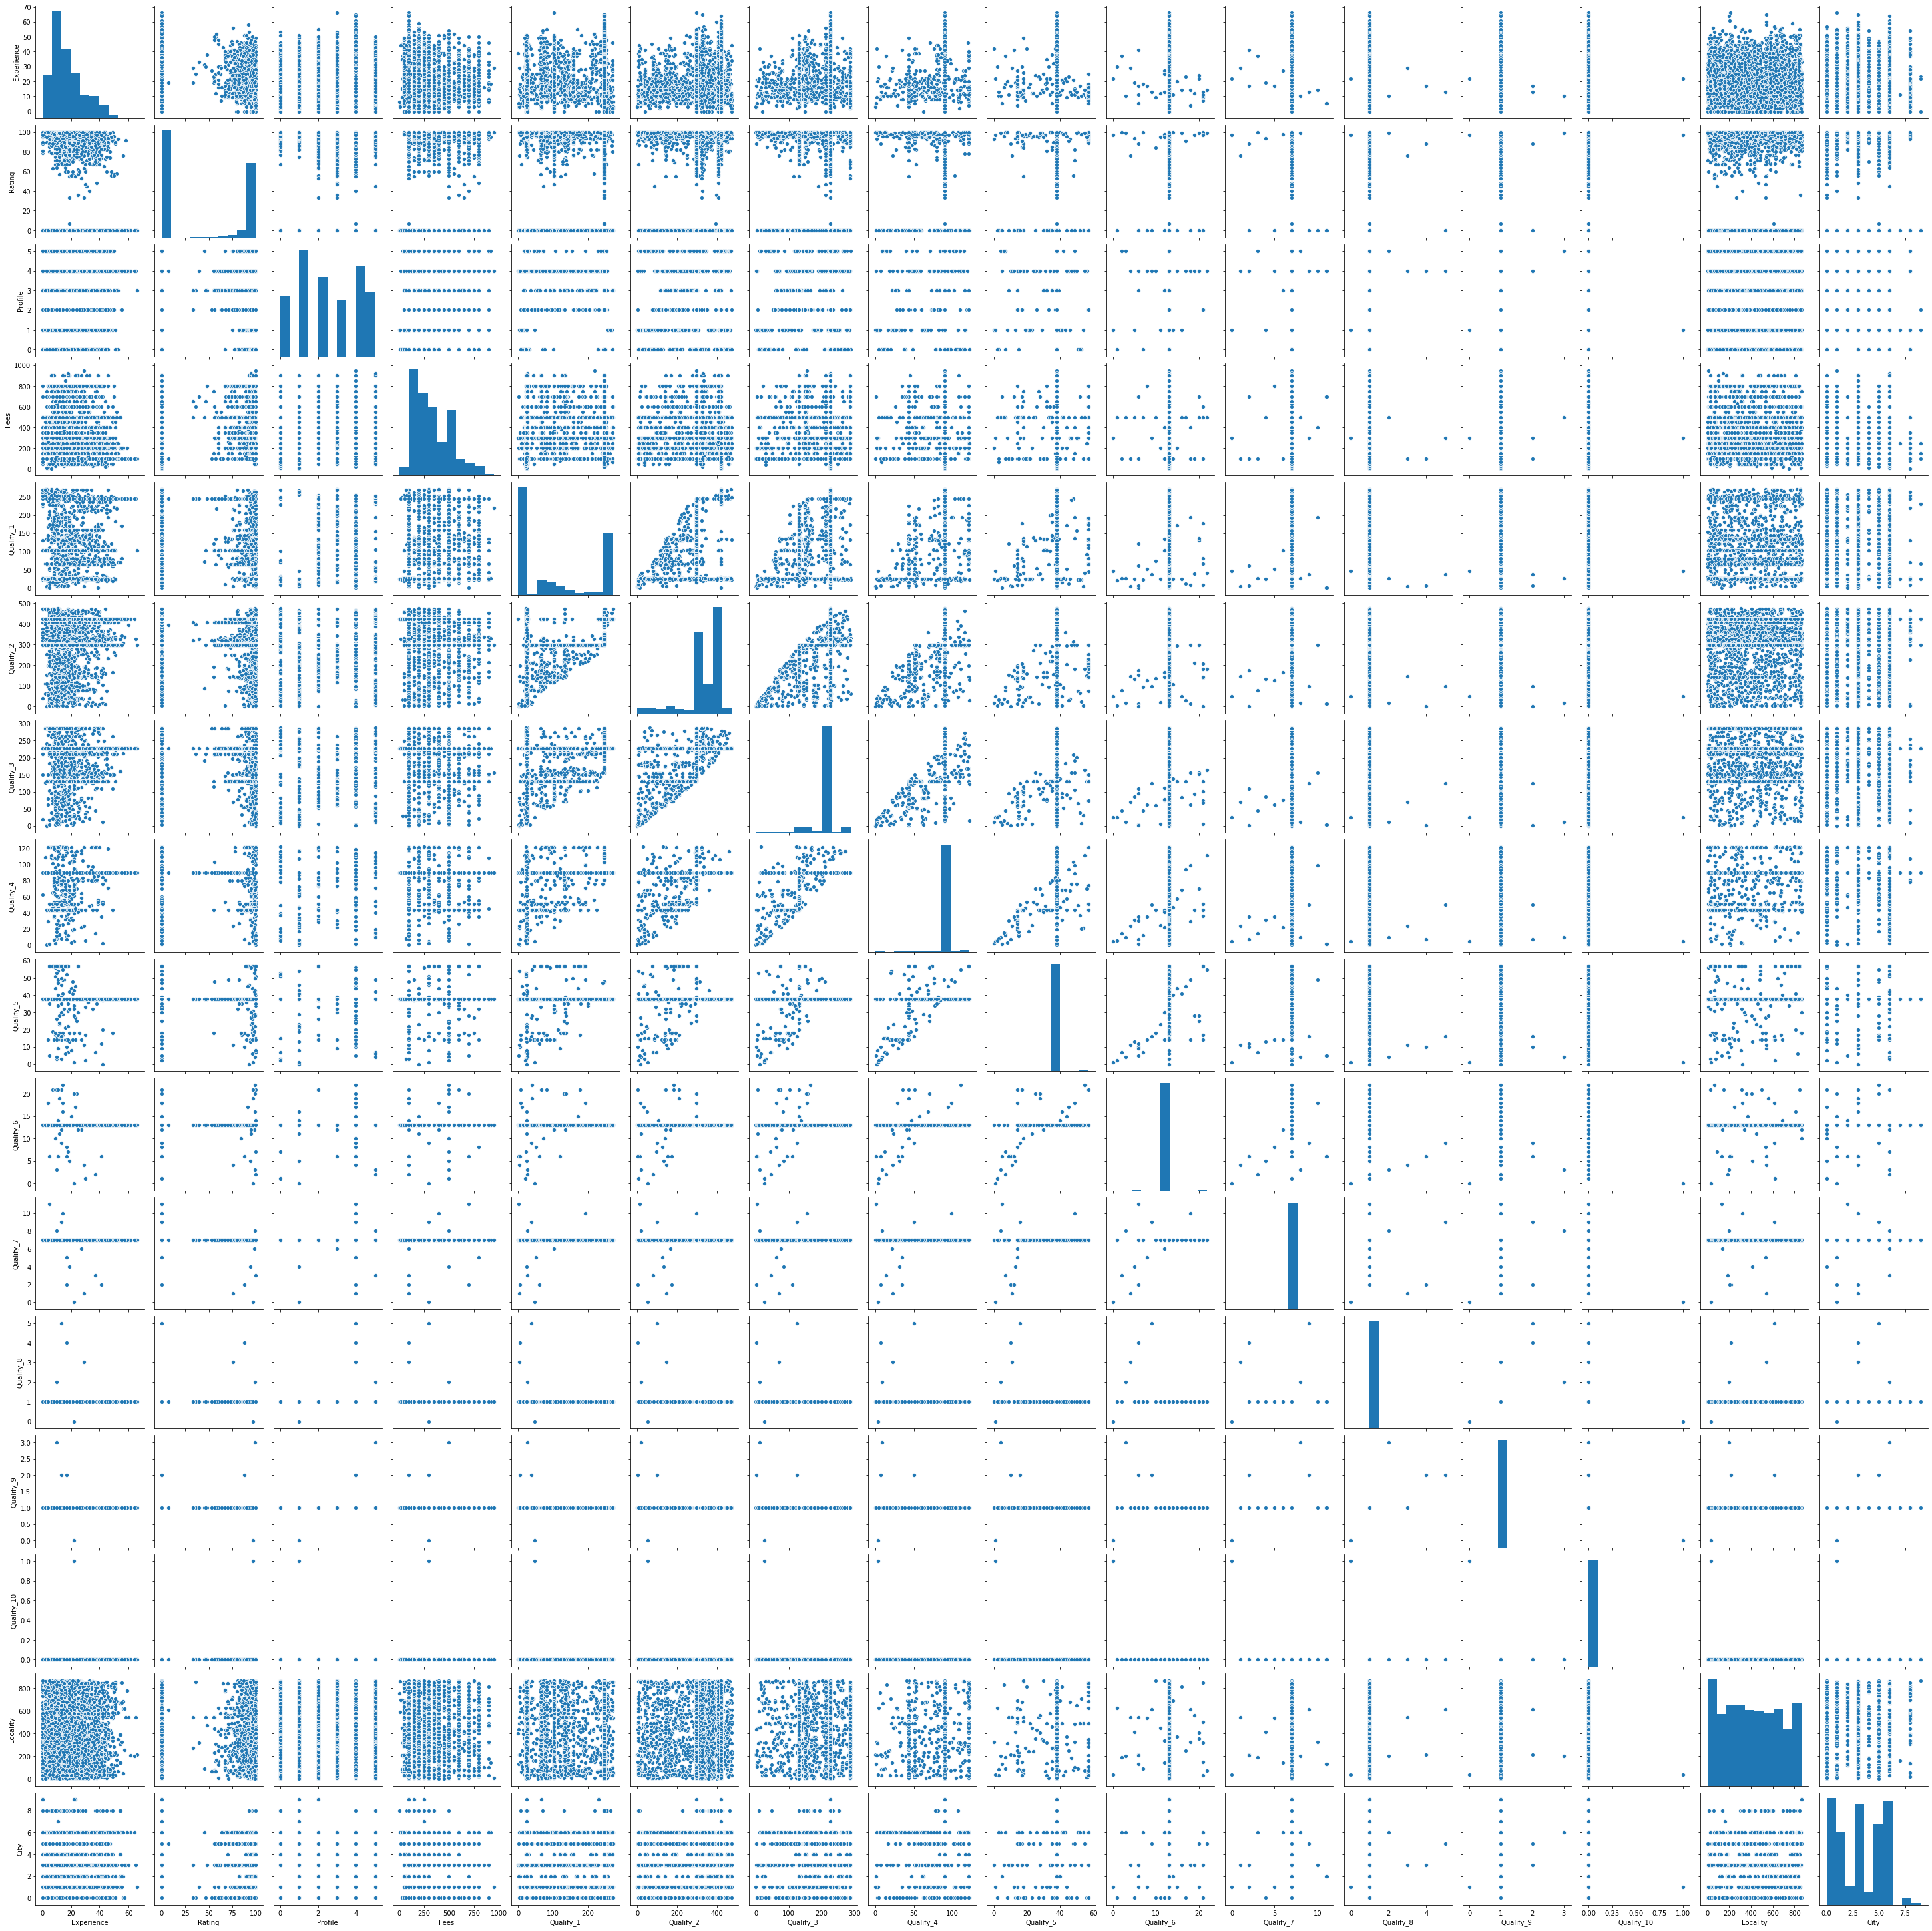

In [81]:
# Bivariate Analysis

sns.pairplot(df_train)

# Checking Correlation

In [82]:
dfcor=df_train.corr()
dfcor

,Experience,Rating,Profile,Fees,Qualify_1,Qualify_2,Qualify_3,Qualify_4,Qualify_5,Qualify_6,Qualify_7,Qualify_8,Qualify_9,Qualify_10,Locality,City
Experience,1.000000,-0.038569,0.202073,0.002117,0.234656,-0.027664,-0.040854,-0.006701,-0.029288,-0.023883,-0.032308,-0.001407,-0.010507,0.005459,0.000460,0.013826
Rating,-0.038569,1.000000,-0.126389,0.153273,-0.074494,-0.188114,-0.120634,-0.064524,-0.006090,0.003249,-0.025184,0.001870,0.006449,0.014991,-0.045752,-0.106276
Profile,0.202073,-0.126389,1.000000,0.145226,0.359695,-0.004357,-0.022009,-0.006648,-0.013039,-0.000187,-0.004385,0.025295,0.028570,-0.011266,0.016637,-0.017894
Fees,0.002117,0.153273,0.145226,1.000000,0.193940,-0.153287,-0.070118,-0.044388,-0.006900,0.004261,0.009149,-0.010622,0.004518,-0.000539,-0.063746,-0.041873
Qualify_1,0.234656,-0.074494,0.359695,0.193940,1.000000,0.084165,0.167957,0.076639,0.043807,0.019279,0.019999,-0.019591,-0.013858,-0.008095,0.028496,-0.003112
Qualify_2,-0.027664,-0.188114,-0.004357,-0.153287,0.084165,1.000000,0.607565,0.354250,0.141379,0.048825,0.055483,-0.058355,-0.047639,-0.039017,0.028553,0.023614
Qualify_3,-0.040854,-0.120634,-0.022009,-0.070118,0.167957,0.607565,1.000000,0.505807,0.221157,0.075940,0.090170,-0.075598,-0.063614,-0.061274,0.022716,-0.003834
Qualify_4,-0.006701,-0.064524,-0.006648,-0.044388,0.076639,0.354250,0.505807,1.000000,0.395849,0.188270,0.176501,-0.127137,-0.099157,-0.113861,0.033810,-0.026462
Qualify_5,-0.029288,-0.006090,-0.013039,-0.006900,0.043807,0.141379,0.221157,0.395849,1.000000,0.371213,0.270120,-0.192214,-0.146964,-0.177809,0.010493,0.025627
Qualify_6,-0.023883,0.003249,-0.000187,0.004261,0.019279,0.048825,0.075940,0.188270,0.371213,1.000000,0.473317,-0.234626,-0.170899,-0.326673,0.007160,0.012668


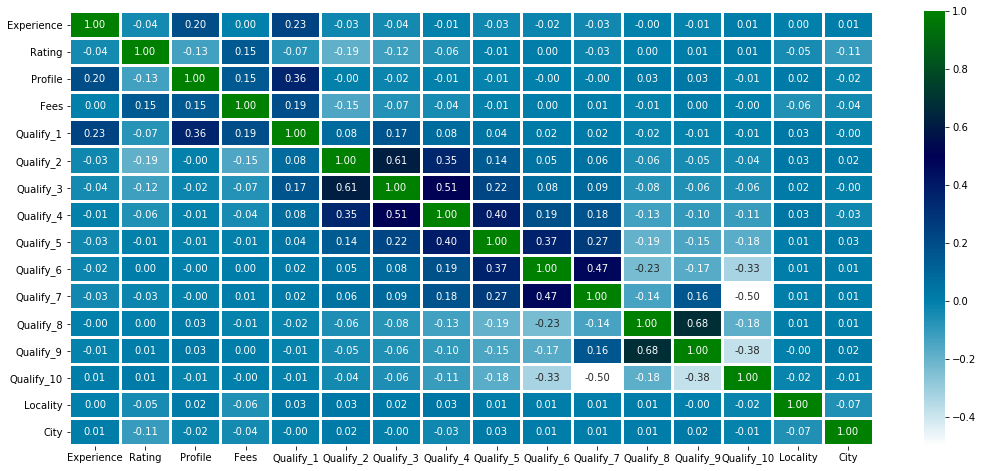

In [84]:
# generating heatmap to check the correlation amount features
plt.figure(figsize=(18,8))
sns.heatmap(dfcor,cmap='ocean_r',linewidths=2,fmt=".2f",annot=True)
# Duration and source got a high negative correlation

# Plotting Outliers

In [85]:
df_train.shape

(5961, 16)

In [87]:
collist = df_train.columns.values
ncol=16
nrows=10

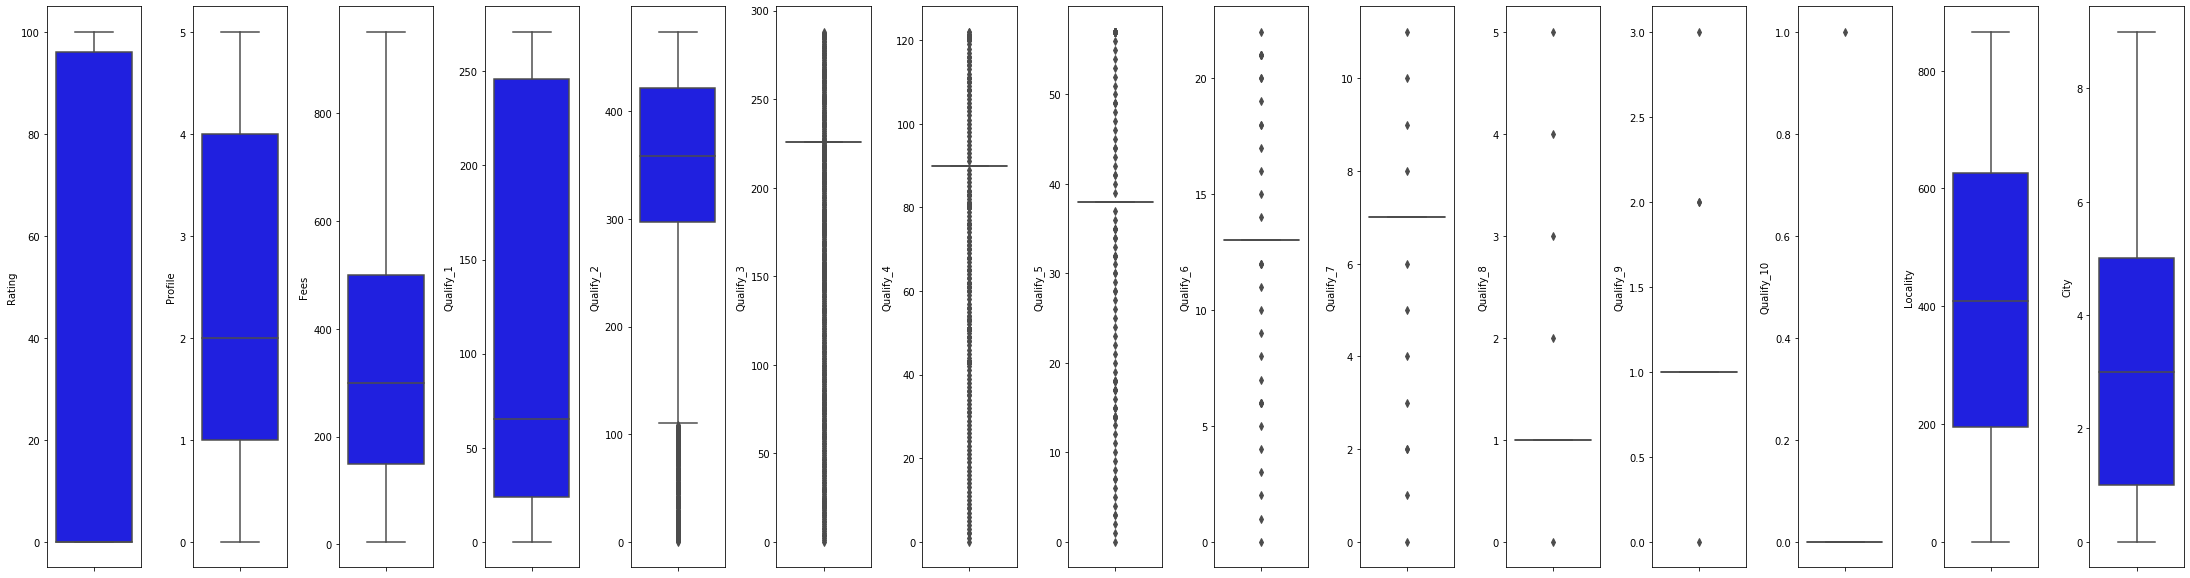

In [88]:
plt.figure(figsize=(2*ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_train[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [89]:
# finding outliers if there are any in the dataset

from scipy.stats import zscore
z_score=abs(zscore(df_train))
print(df_train.shape)
train = df_train.loc[(z_score<3).all(axis=1)]
print(train.shape)
# outliners have been removed and the new shape of the dataset is reflection below

(5961, 16)
(5514, 16)


# Checking Skewness

In [90]:
train.skew()
# data reflect some skewness

Experience    0.871586
Rating        0.310202
Profile       0.098190
Fees          0.723217
Qualify_1     0.514406
Qualify_2    -1.400770
Qualify_3    -1.595035
Qualify_4     0.340958
Qualify_5     4.630282
Qualify_6     0.000000
Qualify_7     0.000000
Qualify_8     0.000000
Qualify_9     0.000000
Qualify_10    0.000000
Locality      0.102923
City          0.091234
dtype: float64

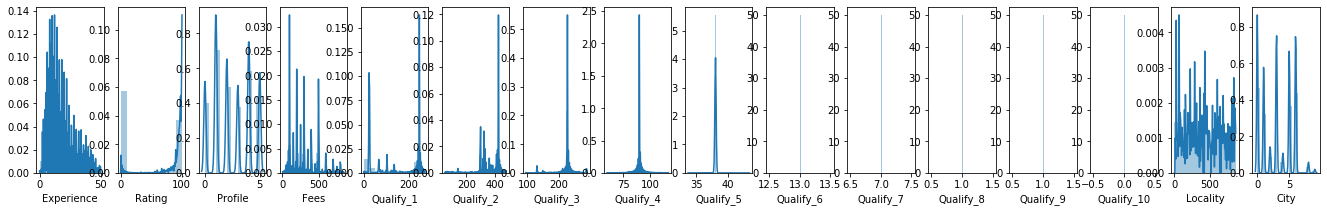

In [91]:
plt.figure(figsize=(23,36))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(train[collist[i]],kde_kws={'bw':0.1})

In [93]:
# treating skewness with log
import numpy as np
for col in train.columns:
    if train.skew().loc[col]>0.55:
        train[col] = np.log1p(train[col])

train.skew()
# positive skewness removed

Experience   -0.947443
Rating        0.310202
Profile       0.098190
Fees         -0.312281
Qualify_1     0.514406
Qualify_2    -1.400770
Qualify_3    -1.595035
Qualify_4     0.340958
Qualify_5    -1.787113
Qualify_6     0.000000
Qualify_7     0.000000
Qualify_8     0.000000
Qualify_9     0.000000
Qualify_10    0.000000
Locality      0.102923
City          0.091234
dtype: float64

# Seperating input and output 

In [95]:
# defining x and y
x = train.drop("Fees", axis = 1)
y = train['Fees'].copy()

In [96]:
x.head(2)

,Experience,Rating,Profile,Qualify_1,Qualify_2,Qualify_3,Qualify_4,Qualify_5,Qualify_6,Qualify_7,Qualify_8,Qualify_9,Qualify_10,Locality,City
0,3.218876,100,5,26,330,226,90,3.663562,13,7,1,1,0,296,4
1,2.564949,98,0,22,316,226,90,3.663562,13,7,1,1,0,855,0


In [97]:
y.head(2)

0    4.615121
1    5.860786
Name: Fees, dtype: float64

In [98]:
x.shape

(5514, 15)

In [99]:
y.shape

(5514,)

In [101]:
# Scaling down using standard scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 0.75228752,  1.25849669,  1.52873961, ...,  0.        ,
        -0.46440432,  0.38705322],
       [-0.18565222,  1.21603768, -1.47171252, ...,  0.        ,
         1.72080182, -1.31895114],
       [-0.5619665 , -0.86445343,  0.32855876, ...,  0.        ,
         0.14542065, -1.31895114],
       ...,
       [ 1.49640377,  1.19480818,  0.92864918, ...,  0.        ,
        -0.78104421, -0.03944787],
       [ 0.11216905,  1.04620168,  0.92864918, ...,  0.        ,
         1.66216481,  1.2400554 ],
       [ 0.2811076 ,  1.25849669, -0.87162209, ...,  0.        ,
         0.71224514, -0.03944787]])

# importing libraries fpr ML

In [102]:
# importing important libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
# finding best random state between 42 to 100 with test_size=0.22
max_r_score = 0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.22)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_predict = lr.predict(x_test)
    r2_scr = r2_score(y_test, y_predict)
    print("r2_score corresponding to random state: ",r_state," is: ", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
    print()
    print()
    print("Maximum r2 score corresponding to",final_r_state, "is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.1125320029035749


Maximum r2 score corresponding to 42 is  0.1125320029035749
r2_score corresponding to random state:  43  is:  0.0889492298258967


Maximum r2 score corresponding to 42 is  0.1125320029035749
r2_score corresponding to random state:  44  is:  0.07429549988561446


Maximum r2 score corresponding to 42 is  0.1125320029035749
r2_score corresponding to random state:  45  is:  0.08698197396333518


Maximum r2 score corresponding to 42 is  0.1125320029035749
r2_score corresponding to random state:  46  is:  0.09084721654087902


Maximum r2 score corresponding to 42 is  0.1125320029035749
r2_score corresponding to random state:  47  is:  0.12547573265777667


Maximum r2 score corresponding to 47 is  0.12547573265777667
r2_score corresponding to random state:  48  is:  0.10247713205743725


Maximum r2 score corresponding to 47 is  0.12547573265777667
r2_score corresponding to random state:  49  is:  0.12294275531358101


Maxi

In [104]:
# Since the maximum r2 score is coming around 0.13 with random state 57, which is very bad
# However checking with other models to see if we get any better score 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=57,test_size=0.22)

In [105]:
x_train.shape

(4300, 15)

In [106]:
y_train.shape

(4300,)

In [107]:
x_test.shape

(1214, 15)

In [108]:
y_test.shape

(1214,)

# finding the best parameters for each model using gridsearchCV

In [109]:
svr=SVR()
parameters = {'kernel':('linear','poly','rbf'), 'C':[1,10]}
svgs = GridSearchCV(svr, parameters, cv = 5)
svgs.fit(x_train,y_train)
svgs.best_params_

{'C': 1, 'kernel': 'rbf'}

In [110]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors':range(1,30)}
knngs = GridSearchCV(knn, parameters, cv = 5)
knngs.fit(x_train, y_train)
knngs.best_params_

{'n_neighbors': 29}

In [111]:
rfr = RandomForestRegressor()
parameters = {'n_estimators':[50,100,150,200,250,300]}
rfgs = GridSearchCV(rfr, parameters, cv = 5)
rfgs.fit(x_train, y_train)
rfgs.best_params_

{'n_estimators': 200}

In [112]:
dtr = DecisionTreeRegressor()
parameters = {'criterion':('mse','friendman_mse', 'mse')}
dtgs = GridSearchCV(dtr, parameters, cv = 5)
dtgs.fit(x_train, y_train)
dtgs.best_params_

{'criterion': 'mse'}

In [113]:
lso = Lasso()
parameters = {'alpha':[0.001,0.01,0.1,1]}
lsgs = GridSearchCV(lso, parameters, cv = 5)
lsgs.fit(x_train, y_train)
lsgs.best_params_

{'alpha': 0.001}

In [114]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate':[0.001,0.01,0.1,1], 'n_estimators':[10,100,500,1000]}
gbgs = GridSearchCV(gbr, parameters, cv = 5)
gbgs.fit(x_train, y_train)
gbgs.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [115]:
lr = LinearRegression()
svr = SVR(C=1, kernel = 'rbf')
knn = KNeighborsRegressor(n_neighbors = 29)
rfr = RandomForestRegressor(n_estimators = 200)
dtr = DecisionTreeRegressor(criterion ='mse')
lso = Lasso(alpha =0.001 )
gbr = GradientBoostingRegressor(learning_rate = 0.1, n_estimators = 100)

In [116]:
models = []
models.append(('LineatRegression', lr))
models.append(('SVR', svr))
models.append(('KNeighborsRegressor', knn))
models.append(('RandomForestRegressor', rfr))
models.append(('DecisionTreeRegressor', dtr))
models.append(('Lasso', lso))
models.append(('GradientBoostingRegressor', gbr))

In [117]:
# Testing all required models with best parameters calculated

Model = []
score = []
rmse = []
mae = []
mse = []
cvs = []
std = []

for name,model in models:
    print ('******************', name ,'********************')
    print("\n")
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pred = model.predict(x_test)
    print("\n")
    rscore = r2_score(y_test, pred)
    print("r2 Score =", rscore)
    score.append(rscore*100)
    print("\n")
    RMS = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE =", RMS)
    rmse.append(RMS*100)
    print("\n")
    MA = mean_absolute_error(y_test, pred)
    print("MAE =", MA)
    mae.append(MA*100)
    print("\n")
    MS = mean_squared_error(y_test, pred)
    print("MSE =", MS)
    mse.append(MS*100)
    print("\n")
    cvscore = cross_val_score(model, x, y, cv = 10).mean()
    print("Cross_Val_Score =", cvscore)
    cvs.append(cvscore*100)
    print("\n")
    stdscore = cross_val_score(model, x, y, cv = 10).std()
    print("Standard Deviation =", stdscore)
    std.append(stdscore*100)
    print("\n\n")

****************** LineatRegression ********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 Score = 0.13261821803530516


RMSE = 0.6265177797784971


MAE = 0.5205200325702921


MSE = 0.39252452837857743


Cross_Val_Score = 0.10870349416799352


Standard Deviation = 0.019211857951930353



****************** SVR ********************


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 Score = 0.16388293957138056


RMSE = 0.6151227573013396


MAE = 0.48949527060299136


MSE = 0.3783760065500027


Cross_Val_Score = 0.14123986187188714


Standard Deviation = 0.026617484802235823



****************** KNeighborsRegressor ********************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                    weights='uniform')


r2 Score = 0.

In [118]:
import pandas as pd
result = pd.DataFrame({'Model': Model, 'r2_score': score, 'Root_mean_square': rmse, 'Mean_absolute_error': mse, 'Mean_square_error': mse, 'Cross_val_score_mean': cvs, 'Cross_val_score_Std': std})
result

,Model,r2_score,Root_mean_square,Mean_absolute_error,Mean_square_error,Cross_val_score_mean,Cross_val_score_Std
0,LineatRegression,13.261822,62.651778,39.252453,39.252453,10.870349,1.921186
1,SVR,16.388294,61.512276,37.837601,37.837601,14.123986,2.661748
2,KNeighborsRegressor,16.643950,61.418162,37.721906,37.721906,14.608024,2.422657
3,RandomForestRegressor,23.924185,58.674792,34.427312,34.427312,18.941375,3.008973
4,DecisionTreeRegressor,-38.374378,79.132720,62.619874,62.619874,-51.113667,6.600353
5,Lasso,13.258313,62.653045,39.254041,39.254041,10.872847,1.899949
6,GradientBoostingRegressor,24.728185,58.363919,34.063471,34.063471,22.516702,1.959935


In [119]:
# The above result shows that DecisionTreeRegressor is giving the best result

In [120]:
from sklearn.externals import joblib
joblib.dump(dtr,'Doctors_Fee.obj')

['Doctors_Fee.obj']

In [121]:
model=joblib.load('Doctors_Fee.obj')

In [122]:
model.predict(x_test)

array([6.68586095, 5.01727984, 5.30330491, ..., 6.2166061 , 5.70711026,
       6.2166061 ])